In [29]:
pip install pandas matplotlib networkx


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.7 MB 5.3 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [13]:

import pandas as pd

file_path = 'setagayasfcjitaku.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand its structure
df.head()


,Unnamed: 0,SFC,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,jitaku,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,setagaya,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,1.0,2.0,3.0,4.0,5.0,SUM,1.0,2.0,3.0,4.0,5.0,SUM,1.0,2.0,3.0,4.0,5.0,SUM
1,AS2500,2.0,2.0,6.0,2.0,2.0,14,NaN,1.0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,0
2,AS38635,2.0,5.0,NaN,2.0,2.0,11,NaN,5.0,NaN,NaN,NaN,5,NaN,3.0,NaN,NaN,NaN,3
3,AS2907,2.0,NaN,NaN,3.0,4.0,9,NaN,NaN,NaN,NaN,NaN,0,NaN,1.0,NaN,NaN,NaN,1
4,AS2497,3.0,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0


In [16]:
import matplotlib.pyplot as plt

# Clean up and extract relevant data
df_clean = df.iloc[1:].copy()
df_clean.columns = ['AS', 'SFC_1', 'SFC_2', 'SFC_3', 'SFC_4', 'SFC_5', 'SFC_SUM',
                    'jitaku_1', 'jitaku_2', 'jitaku_3', 'jitaku_4', 'jitaku_5', 'jitaku_SUM',
                    'setagaya_1', 'setagaya_2', 'setagaya_3', 'setagaya_4', 'setagaya_5', 'setagaya_SUM']

# Convert numeric columns to float
numeric_cols = df_clean.columns[1:]
df_clean[numeric_cols] = df_clean[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Create a melted DataFrame for distribution plot
df_melted = df_clean.melt(id_vars='AS', value_vars=['SFC_SUM', 'jitaku_SUM', 'setagaya_SUM'],
                          var_name='Location', value_name='Count')

# Drop NaNs
df_melted.dropna(inplace=True)

# Plot
plt.figure(figsize=(12, 6))
for location in df_melted['Location'].unique():
    subset = df_melted[df_melted['Location'] == location]
    plt.hist(subset['Count'], bins=10, alpha=0.5, label=location)

plt.title('AS Rule Distribution per Location (SFC, Jitaku, Setagaya)')
plt.xlabel('Rule Count')
plt.ylabel('Number of AS Entries')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


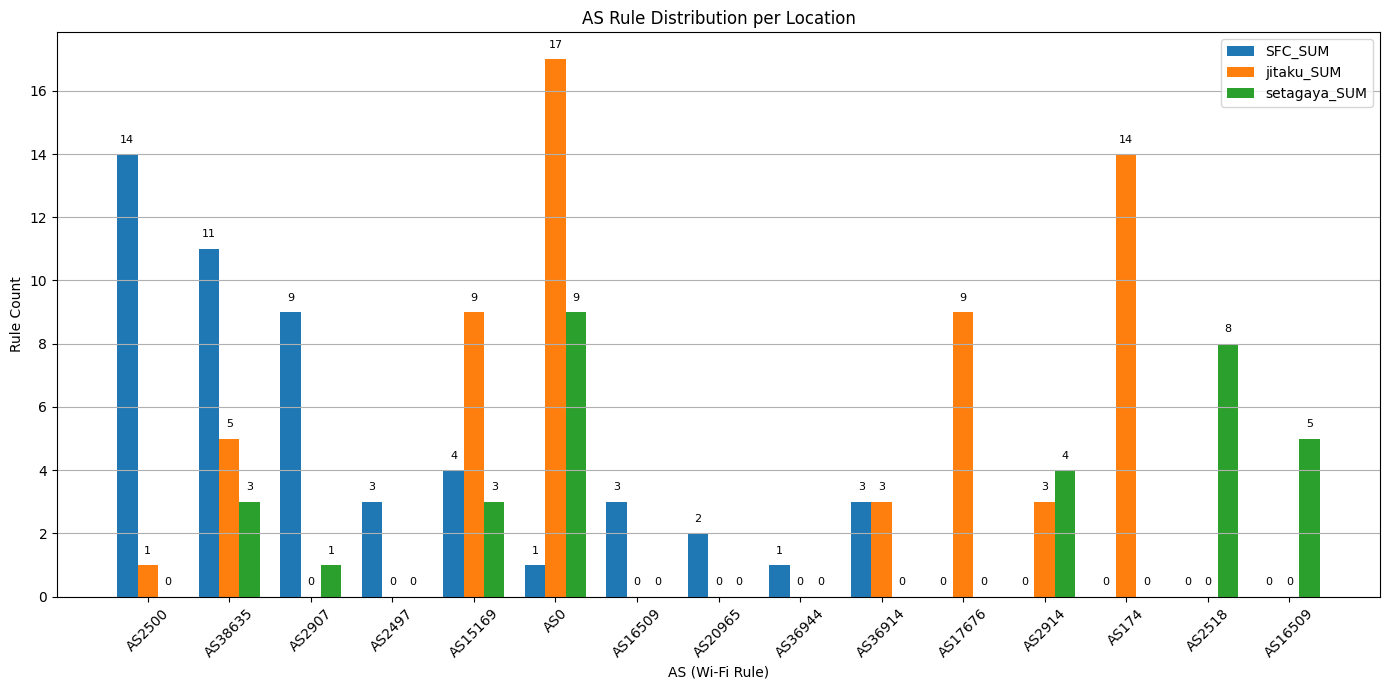

In [17]:
# Plot with value labels on each bar
import numpy as np

# Prepare data for bar chart
summary_df = df_clean[['AS', 'SFC_SUM', 'jitaku_SUM', 'setagaya_SUM']].dropna()
summary_df.set_index('AS', inplace=True)

# Transpose for plotting
summary_df = summary_df.transpose()

# Plot
plt.figure(figsize=(14, 7))
x = np.arange(len(summary_df.columns))
bar_width = 0.25

for i, location in enumerate(summary_df.index):
    plt.bar(x + i * bar_width, summary_df.loc[location], width=bar_width, label=location)
    # Add value labels
    for j, val in enumerate(summary_df.loc[location]):
        plt.text(x[j] + i * bar_width, val + 0.3, str(int(val)), ha='center', va='bottom', fontsize=8)

plt.xticks(x + bar_width, summary_df.columns, rotation=45)
plt.title('AS Rule Distribution per Location')
plt.xlabel('AS (Wi-Fi Rule)')
plt.ylabel('Rule Count')
plt.legend()
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()


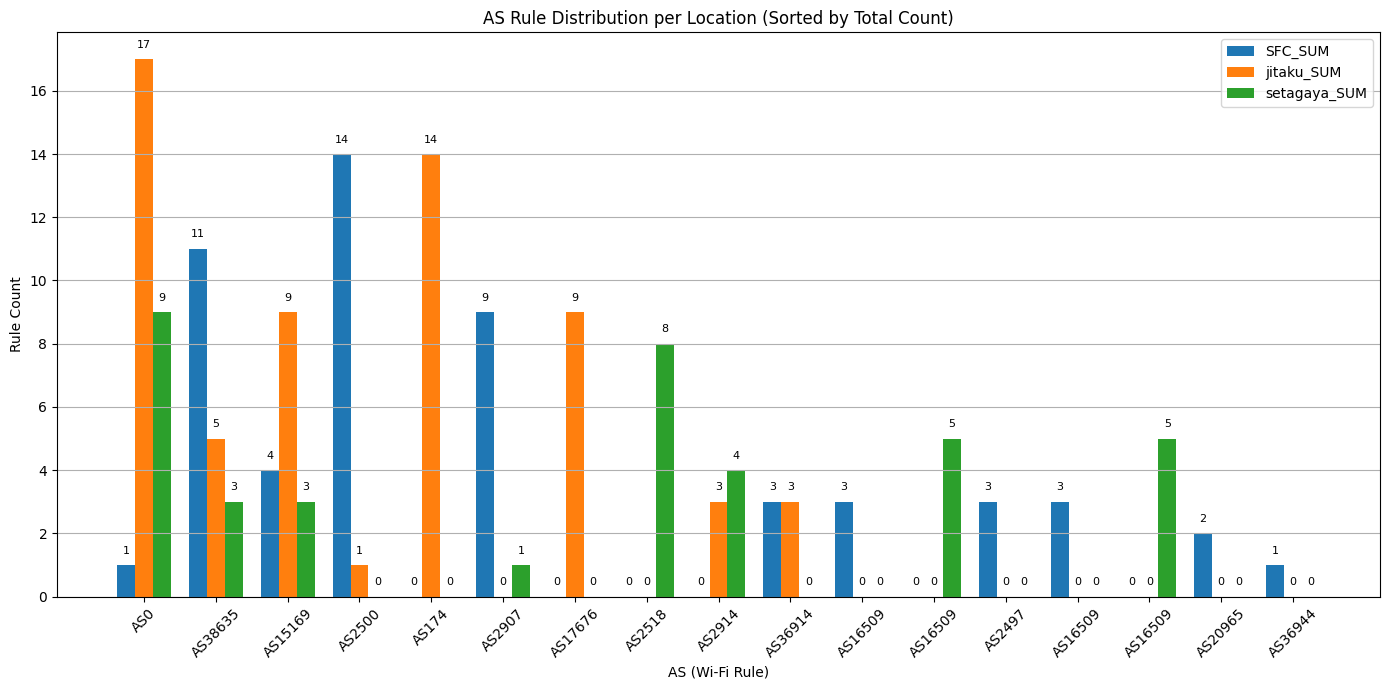

In [18]:
# Sort AS by total rule count (sum across SFC, jitaku, setagaya)
summary_df_sorted = summary_df.loc[:, summary_df.sum(axis=0).sort_values(ascending=False).index]

# Plot again with sorted AS order
plt.figure(figsize=(14, 7))
x = np.arange(len(summary_df_sorted.columns))
bar_width = 0.25

for i, location in enumerate(summary_df_sorted.index):
    plt.bar(x + i * bar_width, summary_df_sorted.loc[location], width=bar_width, label=location)
    for j, val in enumerate(summary_df_sorted.loc[location]):
        plt.text(x[j] + i * bar_width, val + 0.3, str(int(val)), ha='center', va='bottom', fontsize=8)

plt.xticks(x + bar_width, summary_df_sorted.columns, rotation=45)
plt.title('AS Rule Distribution per Location (Sorted by Total Count)')
plt.xlabel('AS (Wi-Fi Rule)')
plt.ylabel('Rule Count')
plt.legend()
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()


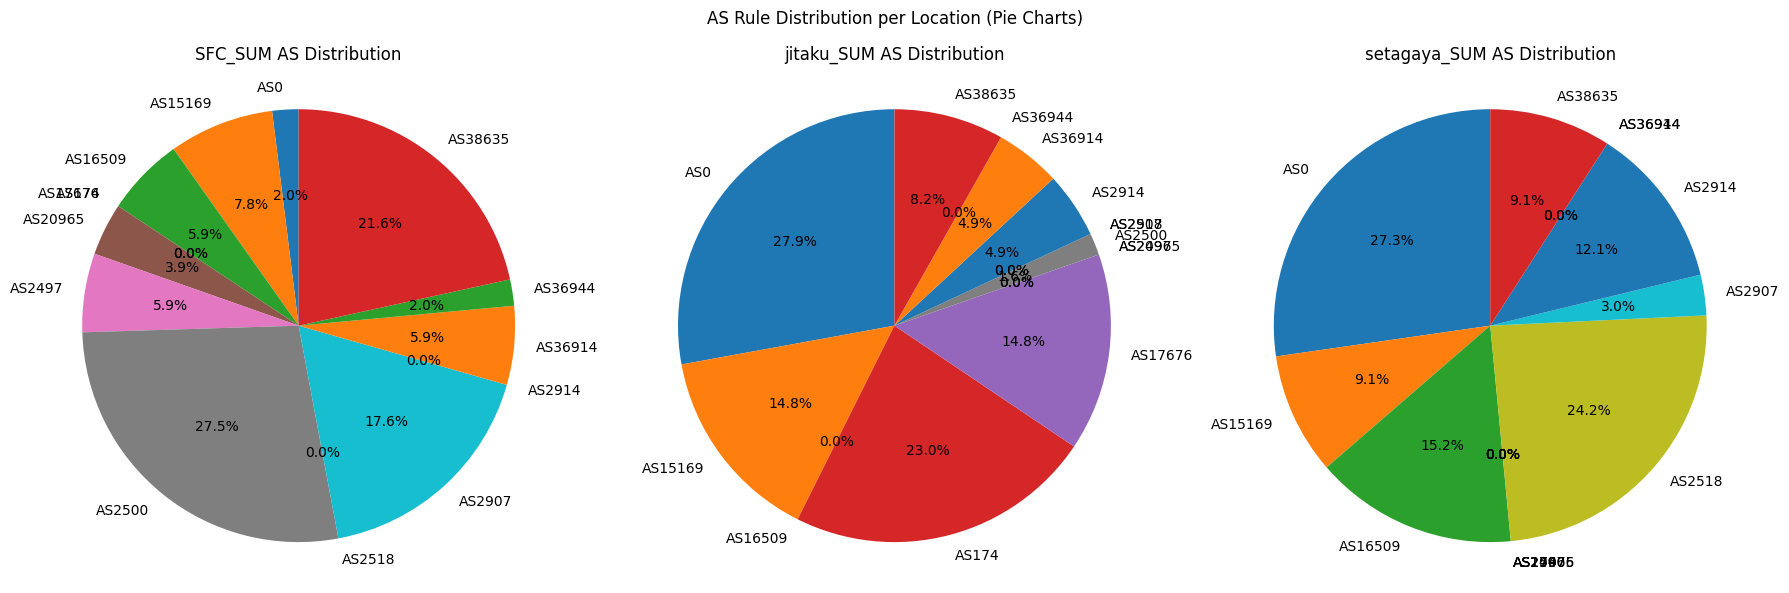

In [20]:
# Prepare data again for static sunburst-like chart
sunburst_data = df_clean[['AS', 'SFC_SUM', 'jitaku_SUM', 'setagaya_SUM']].copy()
sunburst_data = sunburst_data.melt(id_vars='AS', var_name='Location', value_name='Count')
sunburst_data.dropna(inplace=True)

# Aggregate total counts per (Location, AS)
grouped_data = sunburst_data.groupby(['Location', 'AS']).sum().reset_index()

# Create a pie chart for each Location
locations = grouped_data['Location'].unique()

# Plot
fig, axs = plt.subplots(1, len(locations), figsize=(18, 6))

for i, loc in enumerate(locations):
    subset = grouped_data[grouped_data['Location'] == loc]
    axs[i].pie(subset['Count'], labels=subset['AS'], autopct='%1.1f%%', startangle=90)
    axs[i].axis('equal')
    axs[i].set_title(f'{loc} AS Distribution')

plt.suptitle('AS Rule Distribution per Location (Pie Charts)')
plt.tight_layout()
plt.show()


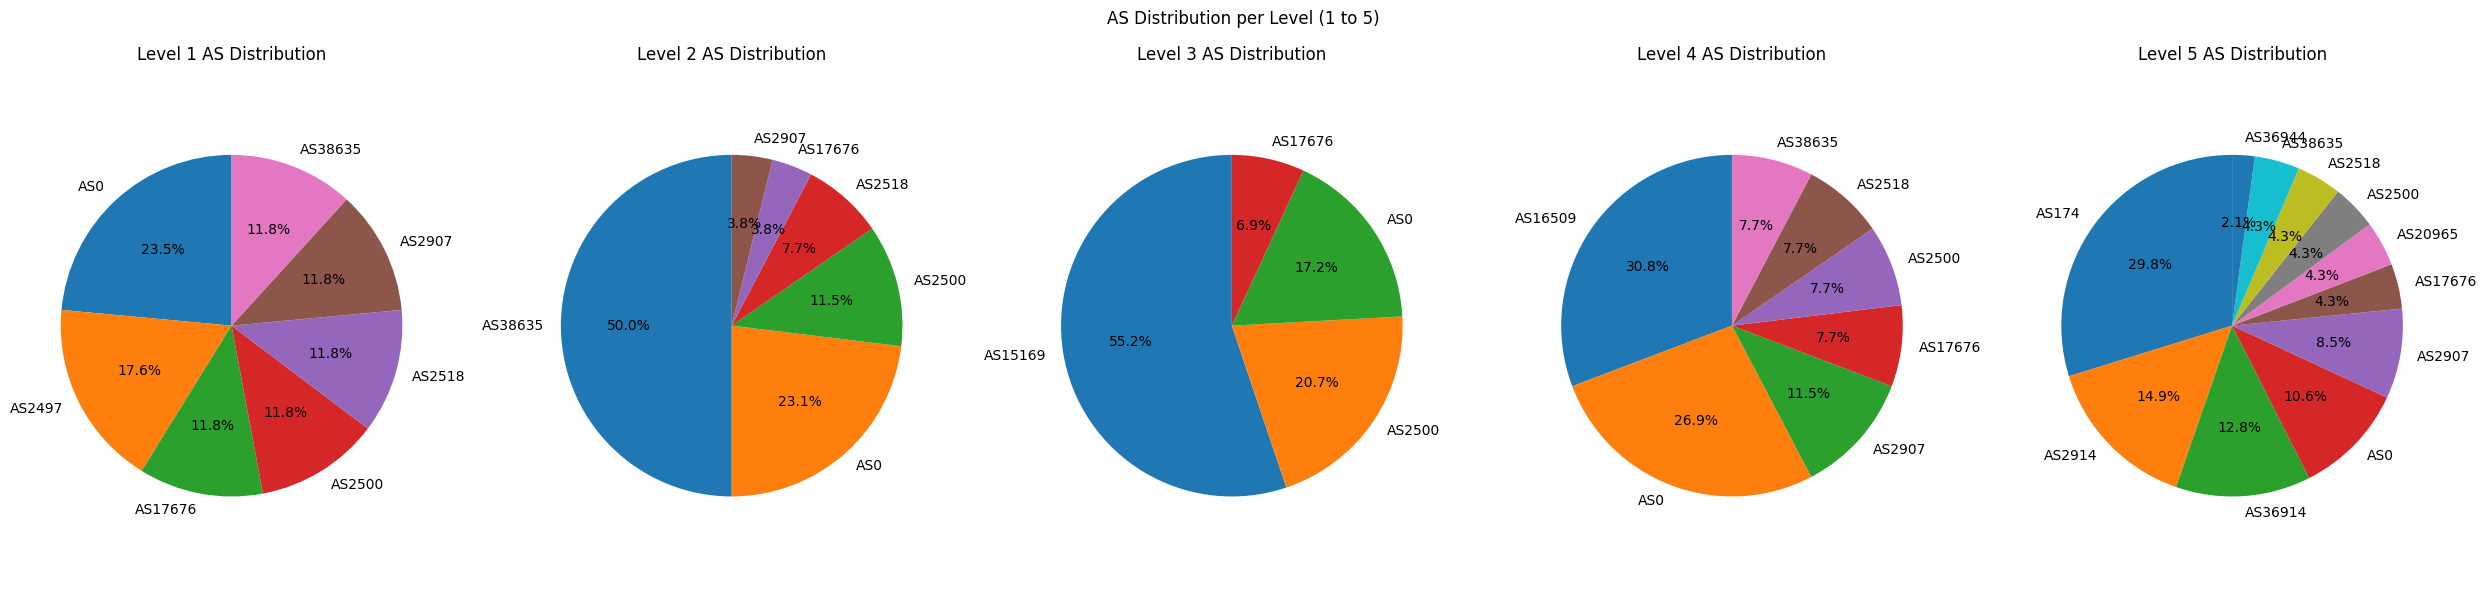

In [21]:
# Prepare data for all levels (1 to 5)
all_levels = {}
for level in range(1, 6):
    level_cols = [f'SFC_{level}', f'jitaku_{level}', f'setagaya_{level}']
    level_df = df_clean[['AS'] + level_cols].copy()
    level_melted = level_df.melt(id_vars='AS', value_vars=level_cols,
                                 var_name='Column', value_name='Count')
    level_melted.dropna(inplace=True)
    level_melted_grouped = level_melted.groupby('AS')['Count'].sum().reset_index()
    level_melted_grouped = level_melted_grouped.sort_values(by='Count', ascending=False)
    all_levels[f'Level {level}'] = level_melted_grouped

# Create pie charts for Level 1 to 5
fig, axs = plt.subplots(1, 5, figsize=(25, 6))

for i, (level_name, data) in enumerate(all_levels.items()):
    axs[i].pie(data['Count'], labels=data['AS'], autopct='%1.1f%%', startangle=90)
    axs[i].axis('equal')
    axs[i].set_title(f'{level_name} AS Distribution')

plt.suptitle('AS Distribution per Level (1 to 5)')
plt.tight_layout()
plt.show()


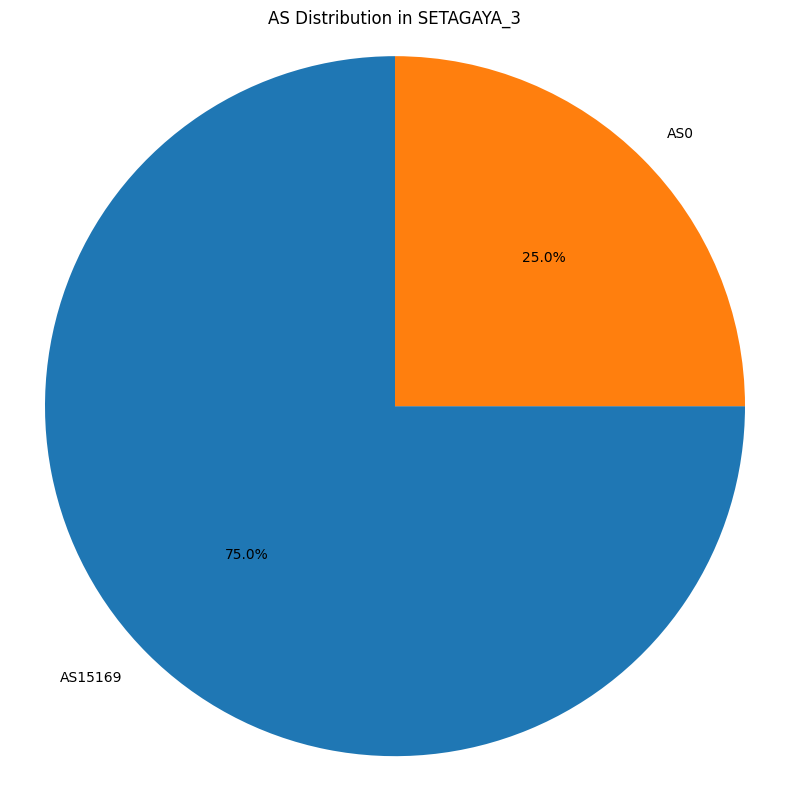

In [22]:
# Let's pick one place and one level: e.g., setagaya_3
single_column = 'setagaya_3'
single_data = df_clean[['AS', single_column]].copy()
single_data.dropna(inplace=True)

# Group by AS for that specific location and level
grouped_single = single_data.groupby('AS')[single_column].sum().reset_index()
grouped_single = grouped_single.sort_values(by=single_column, ascending=False)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(grouped_single[single_column], labels=grouped_single['AS'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title(f'AS Distribution in {single_column.upper()}')
plt.tight_layout()
plt.show()


/var/folders/q9/w321303j3w7_bzp9354q57g00000gn/T/ipykernel_47120/3921460778.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', len(unique_as))


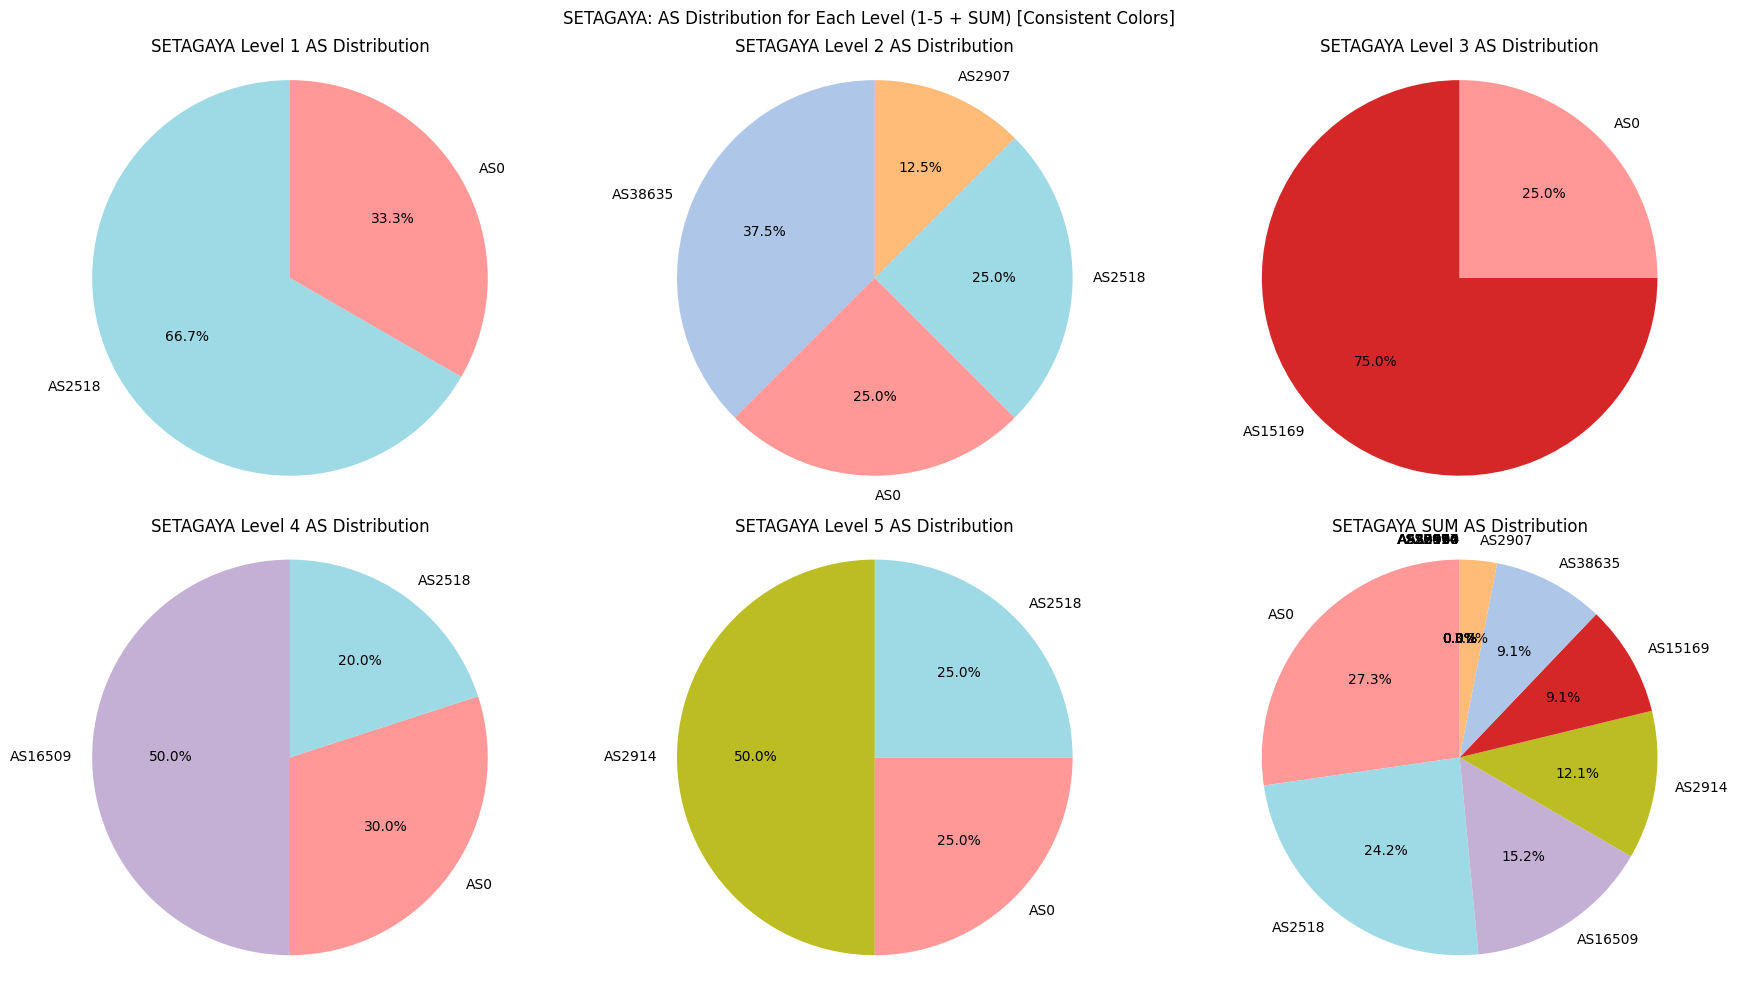

In [24]:
# Create a consistent color map for AS across all charts
import matplotlib.cm as cm
import numpy as np

# Get unique AS values across all levels in setagaya
unique_as = pd.unique(df_clean['AS'].dropna())

# Create a color map (using tab20 or similar) and map it to AS
colors = cm.get_cmap('tab20', len(unique_as))
as_color_map = {as_name: colors(i) for i, as_name in enumerate(unique_as)}

# Plot pie charts with consistent AS colors
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

for i, (level_name, data) in enumerate(level_data_dict.items()):
    data = data[data['AS'].isin(as_color_map.keys())]
    pie_colors = [as_color_map[as_val] for as_val in data['AS']]
    axs[i].pie(data.iloc[:, 1], labels=data['AS'], colors=pie_colors,
               autopct='%1.1f%%', startangle=90)
    axs[i].axis('equal')
    axs[i].set_title(f'SETAGAYA {level_name} AS Distribution')

plt.suptitle('SETAGAYA: AS Distribution for Each Level (1-5 + SUM) [Consistent Colors]')
plt.tight_layout()
plt.show()



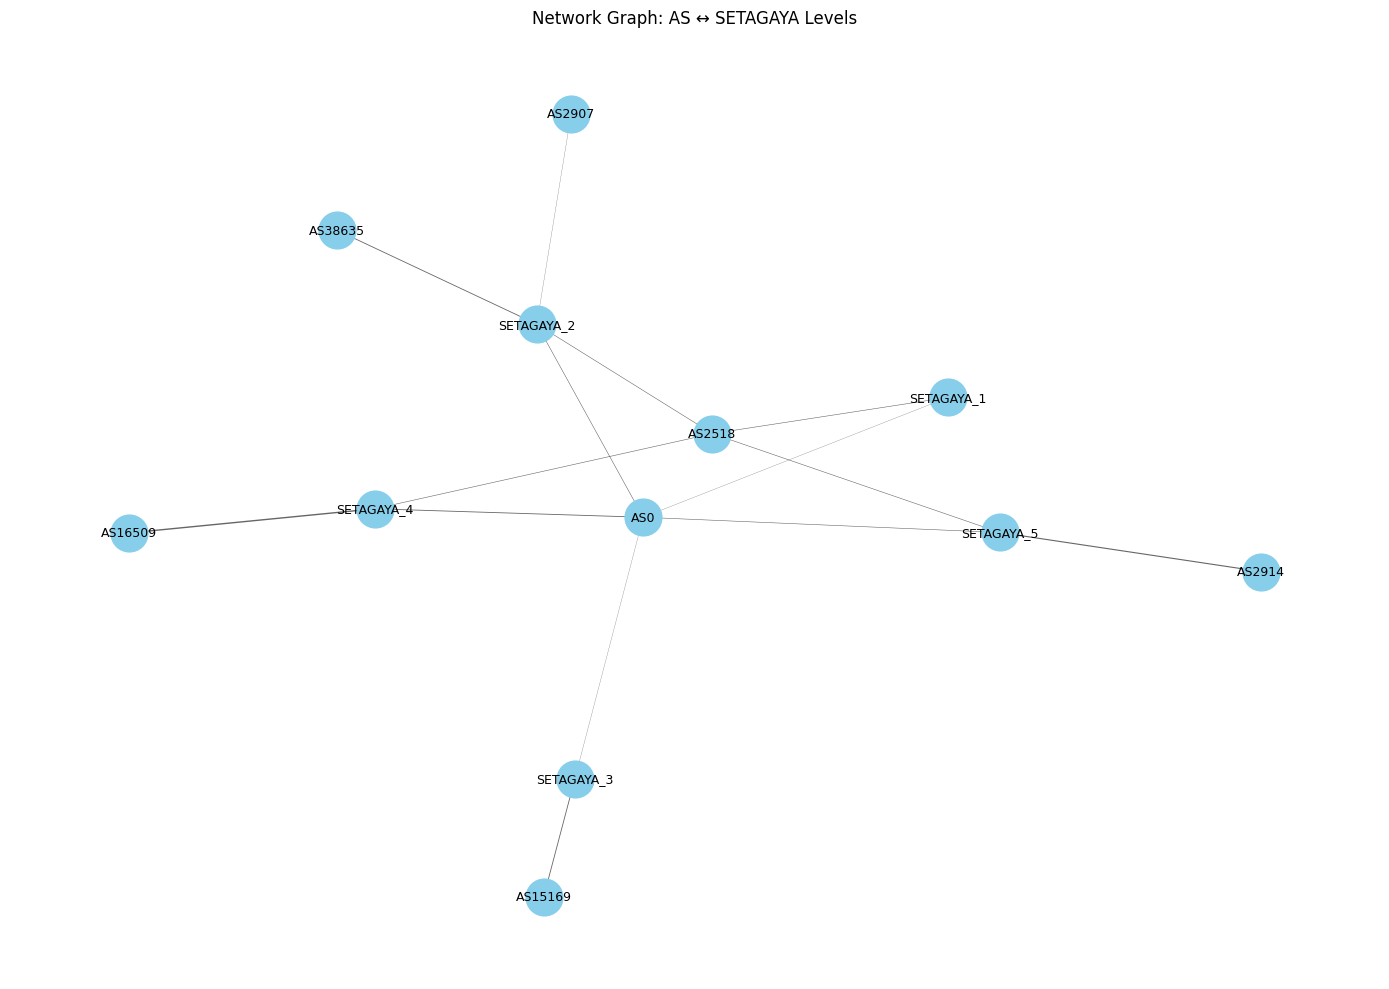

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a network graph: AS (nodes) connected to setagaya levels (nodes) with weights

# Define the levels we're focusing on
setagaya_levels = [f'setagaya_{i}' for i in range(1, 6)]

# Initialize graph
G = nx.Graph()

# Add nodes and edges: AS ↔ Level with weight as rule count
for level in setagaya_levels:
    temp_df = df_clean[['AS', level]].dropna()
    for _, row in temp_df.iterrows():
        as_name = row['AS']
        weight = row[level]
        if weight > 0:
            G.add_edge(as_name, level.upper(), weight=weight)

# Define position using spring layout
pos = nx.spring_layout(G, seed=42)

# Draw network
plt.figure(figsize=(14, 10))
edges = G.edges(data=True)
weights = [d['weight'] for (_, _, d) in edges]

nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=[w * 0.2 for w in weights], alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=9, font_family='sans-serif')

plt.title('Network Graph: AS ↔ SETAGAYA Levels')
plt.axis('off')
plt.tight_layout()
plt.show()


/var/folders/q9/w321303j3w7_bzp9354q57g00000gn/T/ipykernel_47120/625433282.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  as_color_map = cm.get_cmap('tab20', len(as_nodes))


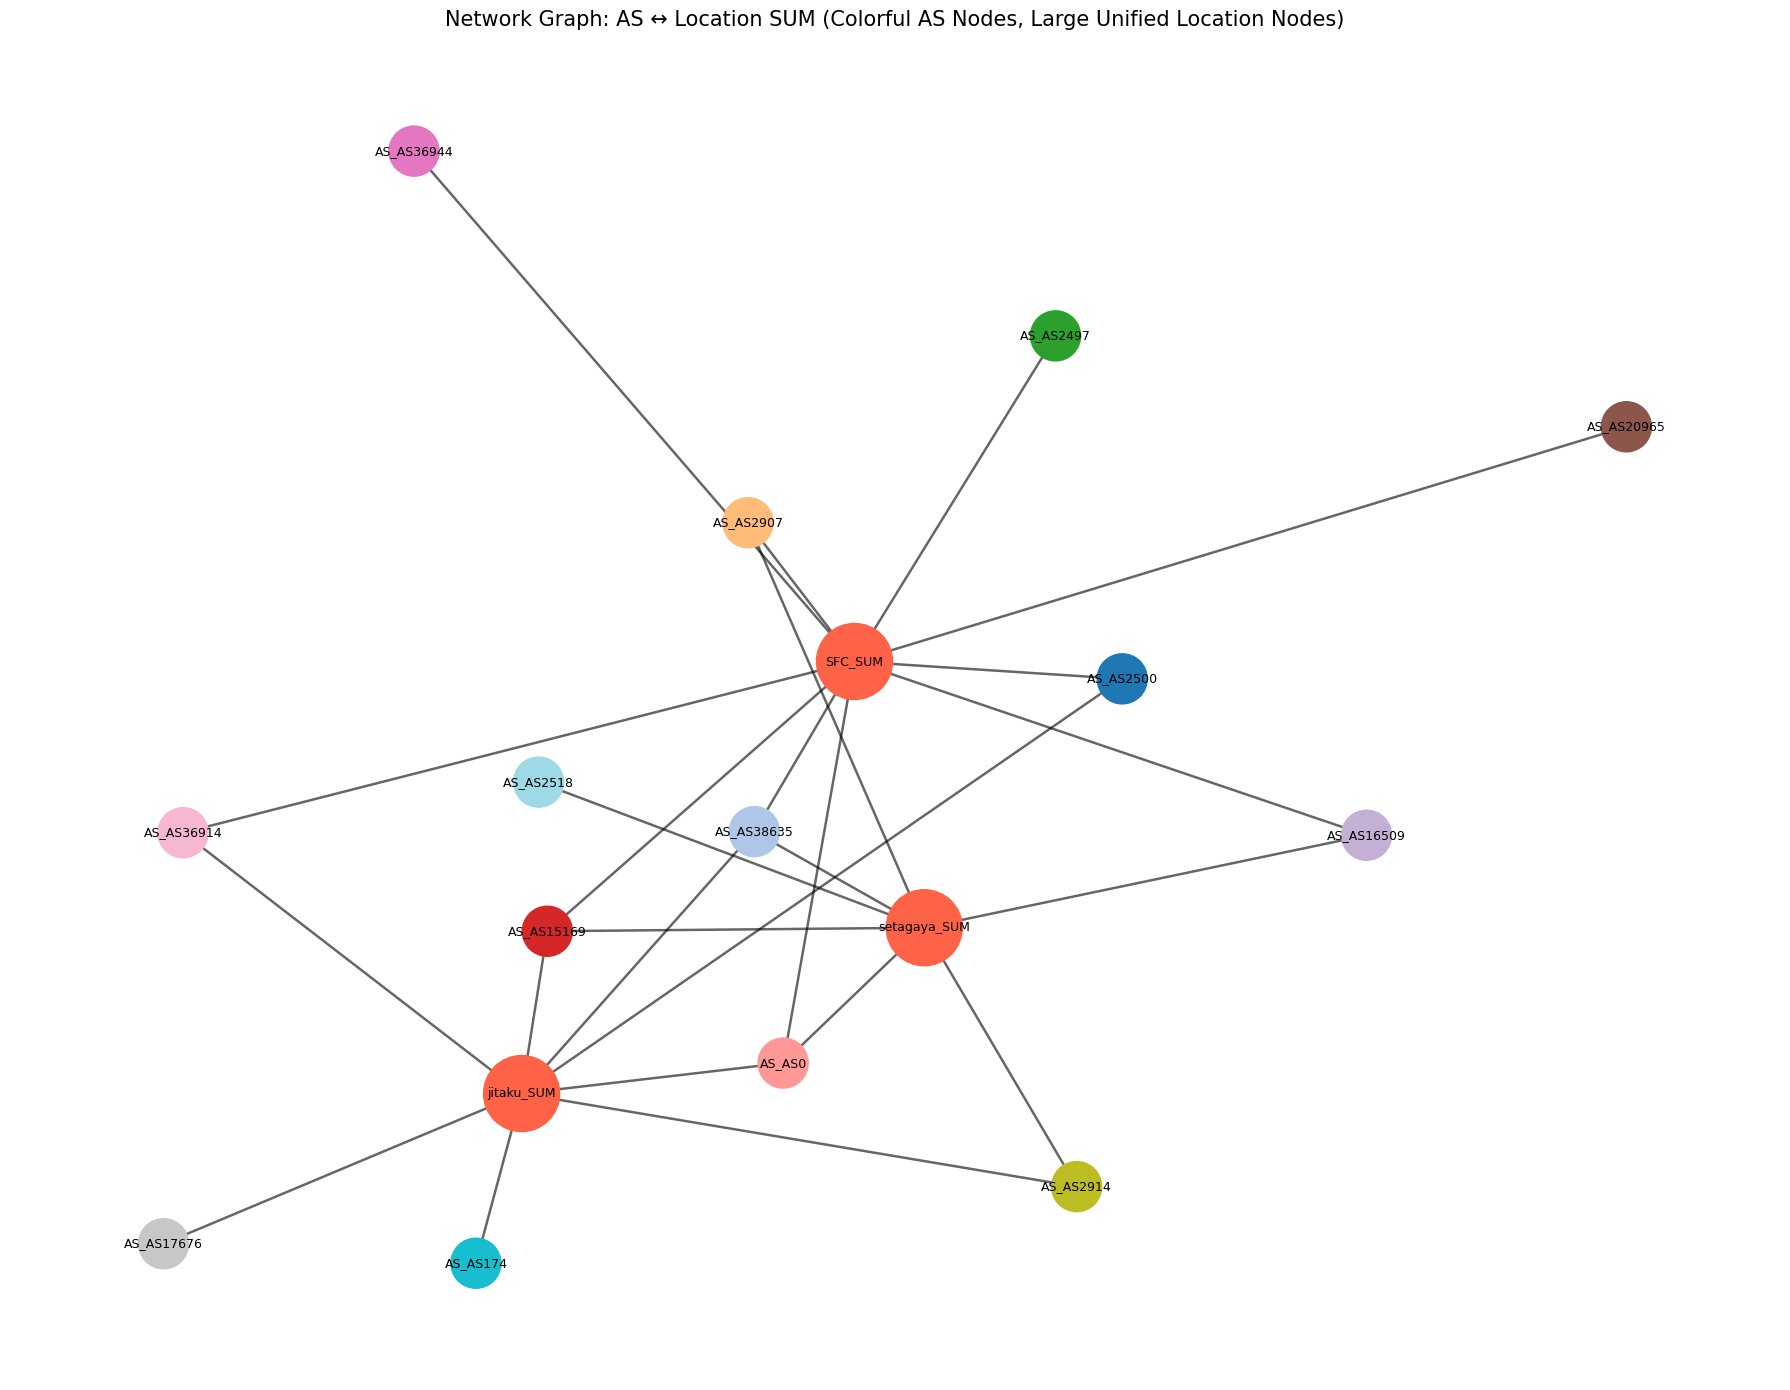

In [39]:
# Updated code as per latest requirements:
# - Use *_SUM columns for connections
# - Colorful AS nodes
# - Large fixed-size and unified color for SFC_SUM, jitaku_SUM, setagaya_SUM
# - Enlarged canvas and overlapping effect

# Define locations and corresponding SUM columns
sum_cols = {
    'SFC': 'SFC_SUM',
    'jitaku': 'jitaku_SUM',
    'setagaya': 'setagaya_SUM'
}

# Initialize graph
G_sum = nx.Graph()
as_connection_count_sum = {}

# Build graph
for _, row in df_clean[['AS'] + list(sum_cols.values())].dropna(how='all', subset=list(sum_cols.values())).iterrows():
    as_code = row['AS']
    as_node = f'AS_{as_code}'
    connection_count = 0

    for loc, col in sum_cols.items():
        if pd.notna(row[col]) and row[col] > 0:
            loc_node = f'{loc}_SUM'
            G_sum.add_node(loc_node)
            G_sum.add_node(as_node)
            G_sum.add_edge(loc_node, as_node, weight=row[col])
            connection_count += 1

    if connection_count > 0:
        as_connection_count_sum[as_node] = connection_count

# Prepare node sizes and colors
as_nodes = [node for node in G_sum.nodes() if node.startswith('AS_')]
as_color_map = cm.get_cmap('tab20', len(as_nodes))
as_color_dict = {as_node: as_color_map(i) for i, as_node in enumerate(as_nodes)}

node_sizes_sum = []
node_colors_sum = []

for node in G_sum.nodes():
    if node in ['SFC_SUM', 'jitaku_SUM', 'setagaya_SUM']:
        node_sizes_sum.append(3000)
        node_colors_sum.append('tomato')  # unified color for all location nodes
    else:
        node_sizes_sum.append(1300)  # large AS nodes for visual prominence
        node_colors_sum.append(as_color_dict[node])

# Draw final graph
pos = nx.spring_layout(G_sum, seed=42)
plt.figure(figsize=(18, 14))  # expanded size
nx.draw_networkx_nodes(G_sum, pos, node_size=node_sizes_sum, node_color=node_colors_sum)
nx.draw_networkx_edges(G_sum, pos, width=1.8, alpha=0.6)
nx.draw_networkx_labels(G_sum, pos, font_size=9)

plt.title('Network Graph: AS ↔ Location SUM (Colorful AS Nodes, Large Unified Location Nodes)', fontsize=15)
plt.axis('off')
plt.tight_layout()
plt.show()

